## Imports

In [202]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # plotting 

## Data

In [243]:
contestants_df = pd.read_csv("data/contestants_encoded_recent.csv")
print(contestants_df.shape)

(348, 66)


In [244]:
contestants_df = contestants_df.iloc[:, :16] # subset to only a few features for illustration
contestants_df.head()

,Name,Age,Occupation,Occupation.Category,Employment,Education.Needed,Hometown,Region,Height,ElimWeek,Season,intro_order,hair_wavy,hair_color,hair_length,ethnicity
0,Alexis Young,26,Attorney,public sector,full-time,post college,"Southlake, TX",south,NaN,2.0,10,1,straight,light-medium,chest,caucasian
1,Amanda Hackney,26,Financial analyst,service,full-time,post college,"Dallas, TX",south,NaN,3.0,10,3,straight,dark,shoulder,caucasian
2,Amber Alchalabi,23,Teacher,public sector,full-time,college,"Sugar Land, Texas",south,NaN,6.0,10,6,straight,medium-dark,chest,caucasian
3,Bevin Nicole Powers,28,Assistant,service,part-time,college,"Palo Alto, California",west,NaN,8.0,10,16,straight-medium,light,shoulder,caucasian
4,Blakeney Rowe,29,Radio sales,communication,full-time,college,"Birmingham, AL",south,NaN,1.0,10,7,straight,light,shoulder,caucasian


In [245]:
# re-encode the 'winners' Elimination week as 0 
contestants_df["ElimWeek"] = contestants_df["ElimWeek"].fillna(0)

In [246]:
# define win/lost as binary variable

def is_lost(item):
    """
    encode the contestants win/loss as 0/1
    0 is lost, 1 is won the season 
    """
    return 0 if item > 0 else 1

contestants_df["Success"] = [is_lost(x) for x in list(contestants_df["ElimWeek"])]

In [247]:
len(contestants_df[contestants_df["Success"]==1])  # very sparse number  of winners 

12

In [248]:
contestants_df[contestants_df["Success"]==1].iloc[:, :16]

,Name,Age,Occupation,Occupation.Category,Employment,Education.Needed,Hometown,Region,Height,ElimWeek,Season,intro_order,hair_wavy,hair_color,hair_length,ethnicity
21,Tessa Horst,26,Social Worker,public sector,full-time,college,"San Francisco, California",west,NaN,0.0,10,17,straight-medium,medium,chest,caucasian
71,Shayne Lamas,22,Actress,service,part-time,high school,"Malibu, California",west,NaN,0.0,12,15,straight,light,shoulder,caucasian
86,Melissa Rycroft,25,Sales Representative,service,full-time,college,"Dallas, Texas",south,NaN,0.0,13,3,straight,medium,shoulder,caucasian
124,Vienna Girardi,23,Marketing Representative,communication,full-time,college,"Geneva, Florida",south,NaN,0.0,14,11,straight-medium,light,chest,caucasian
132,Emily Maynard,25,Children's Hospital Event Planner,service,part-time,college,"Morgantown, West Virginia",south,NaN,0.0,15,28,straight-medium,light,shoulder,caucasian
161,Courtney Robertson,28,Model,service,part-time,high school,"Scottsdale, Arizona",west,NaN,0.0,16,24,straight-medium,medium,chest,caucasian
185,Catherine Giudici,26,Graphic Designer,service,part-time,college,"Seattle, Washington",west,NaN,0.0,17,10,straight,medium,chest,caucasian
228,Nikki Ferrell,26,Pediatric Nurse,public sector,full-time,post college,"Kearney, Missouri",south,NaN,0.0,18,5,straight-medium,light,chest,caucasian
261,Whitney Bischoff,29,Fertility Nurse,service,full-time,post college,"Louisville, Kentucky",south,NaN,0.0,19,2,medium,light,chest,caucasian
280,Lauren Bushnell,25,Flight Attendant,service,full-time,high school,"West Linn, Oregon",west,NaN,0.0,20,9,straight-medium,light,chest,caucasian


In [327]:
winners = contestants_df[contestants_df["Success"]==1]
losers = contestants_df[contestants_df["Success"]==0].sample(n=12, random_state=2)

sample = pd.concat([winners, losers])

In [328]:
sample.sample(n=5, random_state=1)

,Name,Age,Occupation,Occupation.Category,Employment,Education.Needed,Hometown,Region,Height,ElimWeek,Season,intro_order,hair_wavy,hair_color,hair_length,ethnicity,Success
68,Noelle Drake,26,Photographer,service,part-time,high school,"Loveland, Colorado",west,NaN,6.0,12,25,straight-medium,medium,chest,caucasian,0
7,Danielle Imwalle,25,Graphic Designer,communication,part-time,college,"Bethel, Connecticut",northeast,NaN,7.0,10,15,straight,light,shoulder,caucasian,0
124,Vienna Girardi,23,Marketing Representative,communication,full-time,college,"Geneva, Florida",south,NaN,0.0,14,11,straight-medium,light,chest,caucasian,1
167,Jaclyn Swartz,27,Advertising account manager,service,full-time,college,"Newton, Massachusetts",northeast,NaN,3.0,16,22,straight,light,shoulder,caucasian,0
152,Sarah Powell,27,Real Estate Broker,service,full-time,college,"Denver, Colorado",west,NaN,3.0,15,15,straight-medium,light,shoulder,caucasian,0


In [329]:
features = ["Occupation.Category", "Region", "hair_color"]

In [330]:
contestants_df_features_encoded = pd.get_dummies(sample, prefix_sep="_", columns=features)
list(contestants_df_features_encoded)

['Name',
 'Age',
 'Occupation',
 'Employment',
 'Education.Needed',
 'Hometown',
 'Height',
 'ElimWeek',
 'Season',
 'intro_order',
 'hair_wavy',
 'hair_length',
 'ethnicity',
 'Success',
 'Occupation.Category_communication',
 'Occupation.Category_public sector',
 'Occupation.Category_service',
 'Occupation.Category_student',
 'Occupation.Category_unemployed',
 'Region_international',
 'Region_midwest',
 'Region_northeast',
 'Region_south',
 'Region_west',
 'hair_color_light',
 'hair_color_light-medium',
 'hair_color_medium',
 'hair_color_medium-dark']

## Subsample of features 

In [332]:
features = ["hair_color_medium", "Region_south", "Occupation.Category_service"]

Y = sample["Success"].values  # cateogry to be predicted - binary success 
X = contestants_df_features_encoded[features].values  # sample features to make the decision tree

## Make Decision Tree

In [333]:
clf = tree.DecisionTreeClassifier()  # make decision tree object

In [334]:
clf = clf.fit(X, Y)  

## Plot tree

In [335]:
import graphviz 

In [336]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features,
                                filled=True, rounded=True, class_names=["lost", "won"],
                                special_characters=True)  

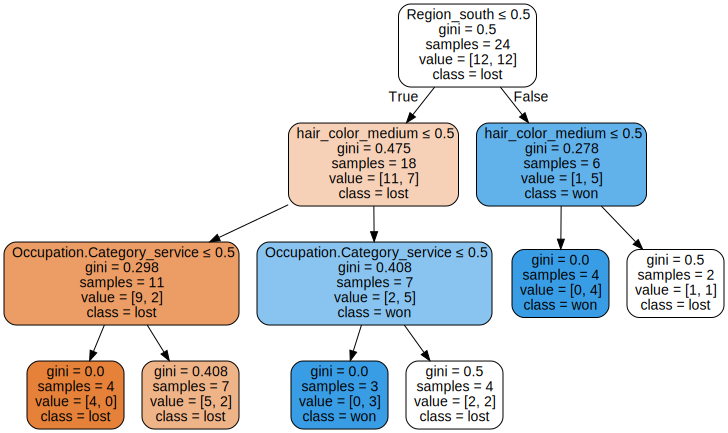

In [337]:
graph = graphviz.Source(dot_data) 
graph

## All Features 

In [338]:
features = ["hair_color_dark", "Region_south", "Occupation.Category_service"]

In [339]:
Y = sample["Success"].values  # cateogry to be predicted - binary success 
X = contestants_df_features_encoded.iloc[:, 14:].values  # sample features to make the decision tree

## Fit

In [340]:
clf = tree.DecisionTreeClassifier()  # make decision tree object

In [341]:
clf = clf.fit(X, Y)  

## Plot

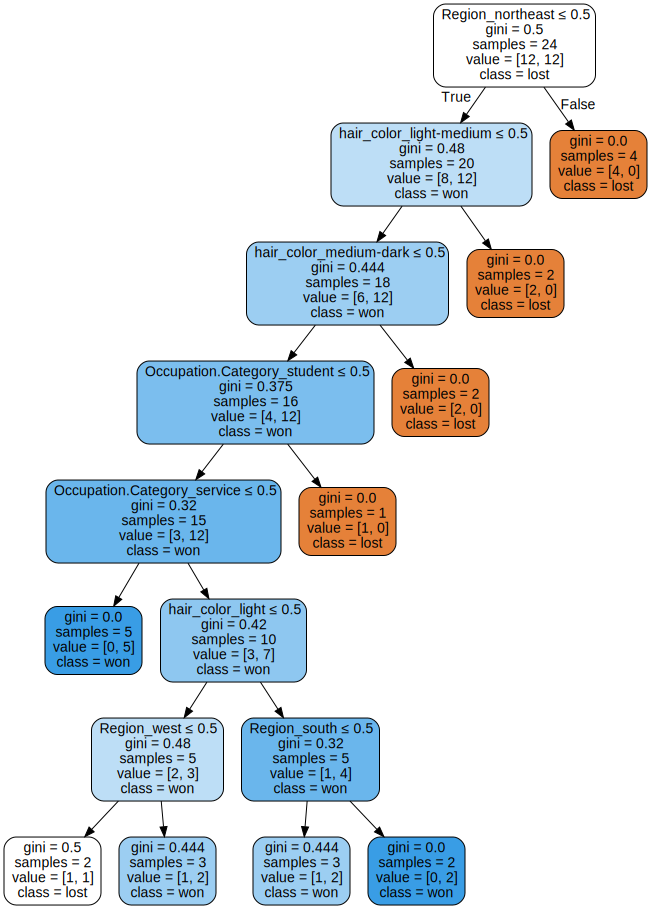

In [342]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(contestants_df_features_encoded.iloc[:, 14:]),
                                filled=True, rounded=True, class_names=["lost", "won"],
                                special_characters=True)  

graph = graphviz.Source(dot_data) 
graph

In [343]:
# keep select curated features, some with a lot of missingness (i.e. hair_wavy)

contestants_features = ["Occupation.Category", "Employment", "Education.Needed", "Region", 
                        "intro_order", "hair_wavy", "hair_length", "hair_color", "ethnicity", "Age"]

contestants_features_df = sample[contestants_features]

In [321]:
# one hot encode data features 
categorical_features = ["Occupation.Category", "Employment", "Education.Needed", "Region", "hair_wavy", "hair_length", "hair_color", "ethnicity"]

contestants_data_encoded = pd.get_dummies(contestants_features_df, prefix_sep="_", columns=categorical_features)
contestants_data_encoded["intro_order"] = contestants_features_df["intro_order"] 
contestants_data_encoded["Age"] = contestants_features_df["Age"] 

In [322]:
Y = sample["Success"].values  # cateogry to be predicted - binary success 
X = contestants_data_encoded.values  # sample features to make the decision tree

In [323]:
clf = tree.DecisionTreeClassifier()  # make decision tree object
clf = clf.fit(X, Y)  

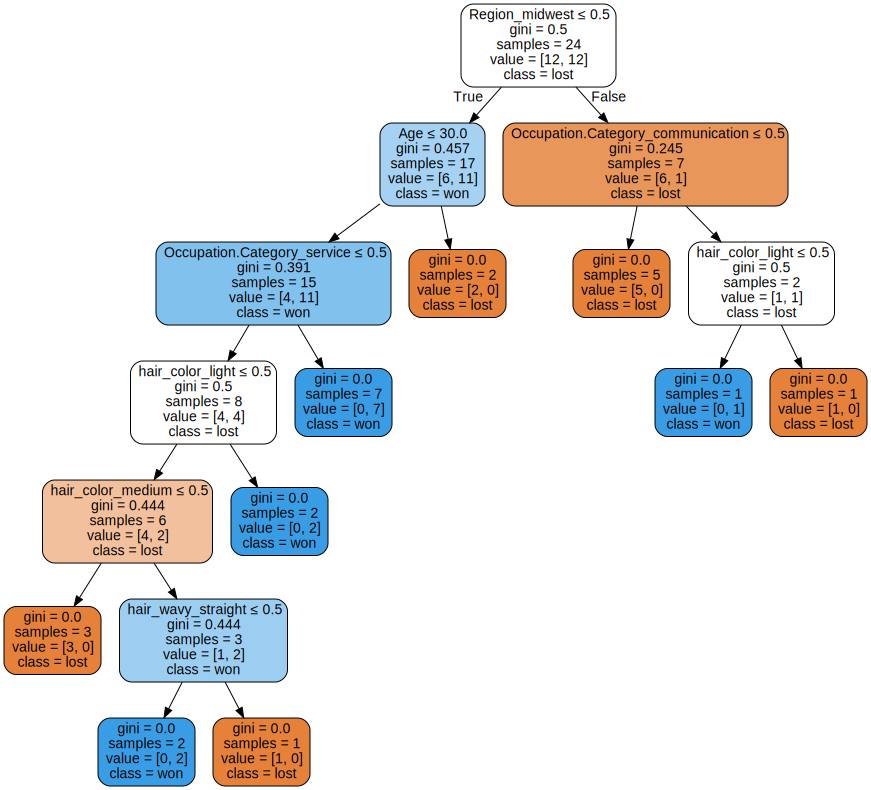

In [326]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(contestants_data_encoded),
                                filled=True, rounded=True, class_names=["lost", "won"],
                                special_characters=True)  

graph = graphviz.Source(dot_data) 
graph